# <span style = "color: green"> Income Evaluation </span>

***

The dataset is credited to Ronny Kohavi and Barry Becker and was drawn from the 1994 United States Census Bureau data and involves using personal details such as education level to predict whether an individual will earn more or less than $50,000 per year.

The Adult dataset is from the Census Bureau and the task is to predict whether a given adult makes more than $50,000 a year based attributes such as education, hours of work per week, etc..

### <span style = "color: blue"> Content </span>

The dataset provides 14 input variables that are a mixture of categorical, ordinal, and numerical data types. The complete list of variables is as follows:

* Age.
* Workclass.
* Final Weight.
* Education.
* Education Number of Years.
* Marital-status.
* Occupation.
* Relationship.
* Race.
* Sex.
* Capital-gain.
* Capital-loss.
* Hours-per-week.
* Native-country.

## Let's Begin

### Import necessary libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read "income_evaluation.csv" dataset and Store it in a DataFrame

In [44]:
df = pd.read_csv('income_evaluation.csv')

### View top 5 rows

In [45]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### View info of the dataset

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Check for any null values

In [47]:
df.isna().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

### View the basic statistical information about the dataset

In [48]:
df.describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Check unique values in income

In [49]:
df.columns = df.columns.str.strip()

In [50]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

### Create a function to convert <=50K to 0 and >50K to 1

In [51]:
def convert_income(x):
    if x ==' >50K':
        return 1
    else:
        return 0

### Apply the function to 'Income' column

In [52]:
df['income'] = df.income.apply(convert_income)

In [53]:
df.income.value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

In [54]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### Check the unique values in income again

In [55]:
df.income.unique()

array([0, 1], dtype=int64)

### View the unique values in all the categorical columns

In [56]:
categorical_columns = [' workclass', ' education', ' marital-status', ' occupation', ' relationship', ' race', ' sex', ' native-country']



In [57]:
df =df.drop(columns='native-country')

### Drop Native-country column

In [58]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,0


## <span style = "color: orange"> Visualization </span>

### Plot a countplot of education

In [59]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'income'],
      dtype='object')

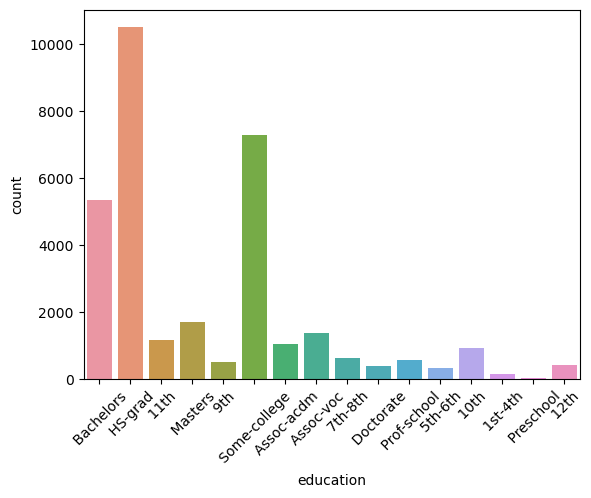

In [60]:
sns.countplot(x=df['education'])
plt.xticks(rotation=45)
plt.show()

### Plot a countplot of marital-status

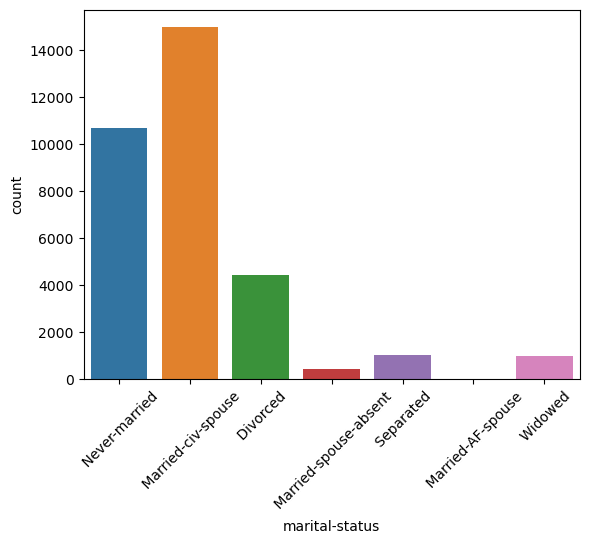

In [62]:
sns.countplot(x=df['marital-status'])
plt.xticks(rotation=45)
plt.show()

### Plot a countplot of workclass with repect to race

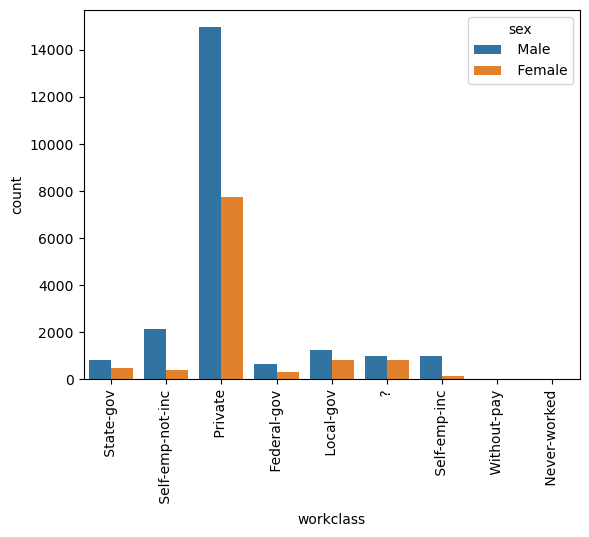

In [63]:
sns.countplot(data=df,x='workclass',hue='sex')
plt.xticks(rotation='vertical')
plt.show()

### Plot a countplot of education with respect to sex

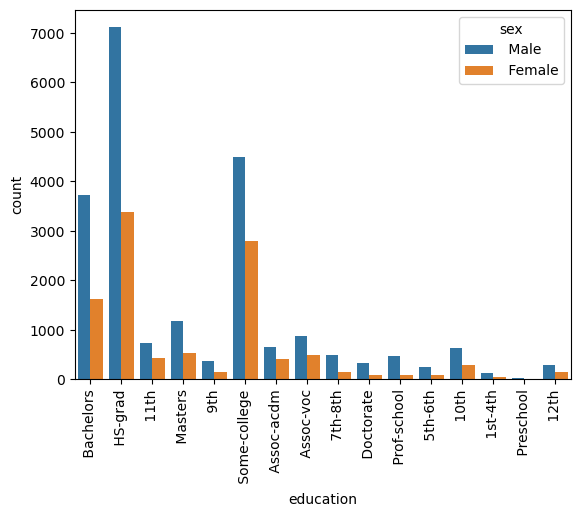

In [64]:
sns.countplot(data=df,x='education',hue='sex')
plt.xticks(rotation='vertical')
plt.show()

### Plot a countplot of occupation with respect to sex

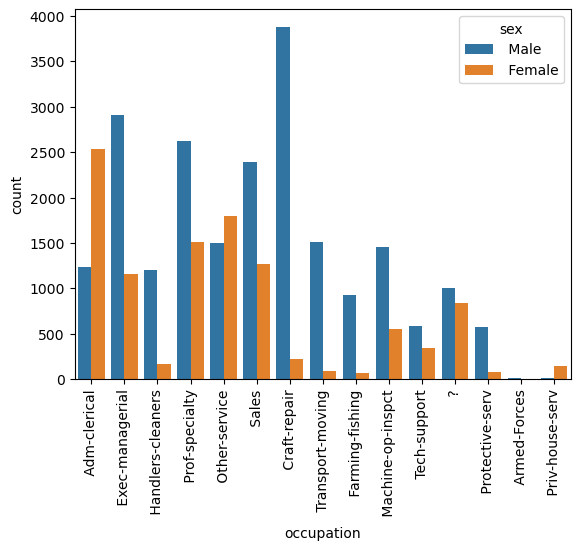

In [65]:
sns.countplot(data=df,x='occupation',hue='sex')
plt.xticks(rotation='vertical')
plt.show()

### Plot a heatmap to view the correlation between features

<Axes: >

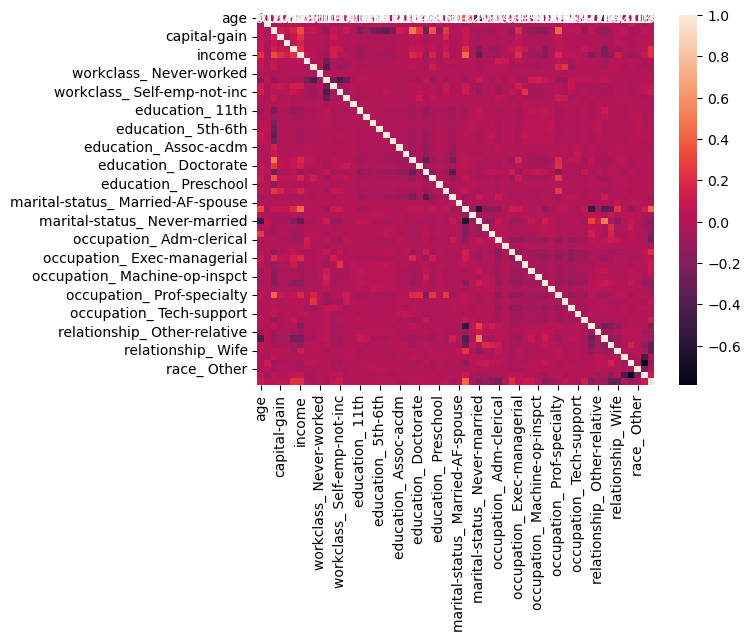

In [71]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

### Plot a pairplot of the dataset

In [ ]:
sns.pairplot(df)

C:\Users\Pakistan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pakistan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pakistan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pakistan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

### Change all the categorical columns into numeric using dummy variables (One Hot Encoding) & store it in a new Dataframe

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.get_dummies(df,dtype=int,drop_first=True)

### Split the dataset into input and target variables

In [ ]:
X = df.drop(columns='income')
y = df['income']

### Carry out feature scaling with Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st = StandardScaler()
X = pd.DataFrame(st.fit_transform(X),columns=st.get_feature_names_out())

In [ ]:
X.head()

### Split the dataset into training & Testing set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

### Check the shape of X_train and X_test

In [ ]:
X_train.shape

In [ ]:
X_test.shape

### Create Gaussian Naive Bayes model

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()

### Train the model

In [ ]:
nb.fit(X_train,y_train)

### Check the score of our model

In [ ]:
nb.score(X_train,y_train)

### Make predictions with X_test

In [ ]:
y_pred = nb.predict(X_test)

### Check the accuracy score of our prediction

In [ ]:
from sklearn import metrics

In [ ]:
metrics.accuracy_score(y_test,y_pred)

### Create confusion matrix

In [ ]:
metrics.confusion_matrix(y_test,y_pred)

### Visualize confusion matrix

In [ ]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='d')

### Create classification report

In [ ]:
print(metrics.classification_report(y_test,y_pred))

***

# <span style = "color: green;font-size:40px"> Great Job!</span>